These notebooks are used to compare a base and scenario, from expanded surveys or model outputs, in H5 format. To run: from the menu bar above, choose **Cell -> Run All ** or run lines individually. Use the toggle button below to hide/show the raw Python code.

## 

*Summaries:*
    - Day Activity Pattern (2.1)
    - Number of Tours (2.2)
---

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [55]:
import os
import numpy as np
import pandas as pd
import h5py
import pylab as P
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


----

# VMT

In [301]:
# Read network summary from latest run
net_sum_scen = pd.read_excel(r'R:\SoundCast\releases\TransportationFutures2010\outputs\network_summary_detailed.xlsx', 
                        sheetname ='Network Summary')
net_sum_base = pd.read_excel(r'R:\SoundCast\releases\soundcast_release_c1\outputs\network_summary_detailed.xlsx',
                            sheetname='Network Summary')

In [302]:
# delete first empty row
net_sum_scen.drop('tod', inplace=True)
net_sum_base.drop('tod', inplace=True)

## VMT by TOD

In [303]:
pd.options.display.float_format = '{:,.0f}'.format

In [304]:
# Sort TOD in coherent order
tod = {
    'am': 0,
    'md': 1,
    'pm': 2,
    'ev': 3,
    'ni': 4
}

In [305]:
# compare scenarios
vmt_scen = net_sum_scen.groupby('TP_4k').sum()
vmt_base = net_sum_base.groupby('TP_4k').sum()

# Select only VMT columns
vmt_scen = vmt_scen[vmt_scen.columns[[i.endswith('_vmt') for i in vmt_scen.columns]]]
vmt_base = vmt_base[vmt_base.columns[[i.endswith('_vmt') for i in vmt_base.columns]]]

In [306]:
df = pd.DataFrame([vmt_scen.sum(axis=1),
              vmt_base.sum(axis=1)]).T
df.columns=[scen_name,base_name]

# sort columns
df['tod_index'] = ([tod[x] for x in df.index])
df.sort('tod_index',inplace=True)
df.drop('tod_index',axis=1,inplace=True)
df.loc['Total'] = df.sum(axis=0)
df

,Daysim,2014 Survey
am,"12,025,908","12,153,300"
md,"28,064,371","28,075,136"
pm,"17,572,611","17,637,430"
ev,"8,884,616","8,712,751"
ni,"13,212,746","12,988,576"
Total,"79,760,252","79,567,193"


**Total VMT by TOD**

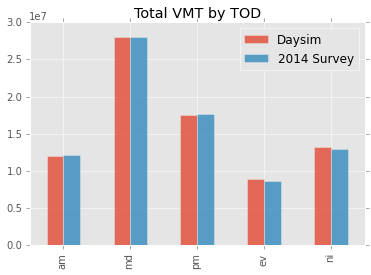

In [307]:
df.drop('Total',inplace=True)
df.plot(kind='bar', alpha=0.8,title='Total VMT by TOD')

** VMT Distribution by TOD**

In [308]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

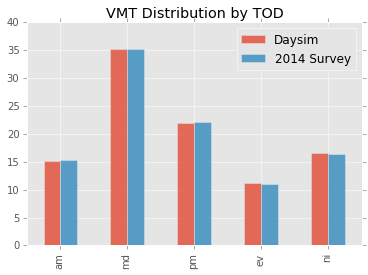

In [309]:
df.plot(kind='bar',alpha=0.8, title='VMT Distribution by TOD')

## VMT by Facility Type

In [310]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=0),
              vmt_base.sum(axis=0)]).T
df.columns=[scen_name,base_name]
df.loc['Total'] = df.sum(axis=0)
df

,Daysim,2014 Survey
arterial_vmt,"35,886,129","36,804,012"
connectors_vmt,"5,535,211","5,407,879"
highway_vmt,"38,338,912","37,355,302"
Total,"79,760,252","79,567,193"


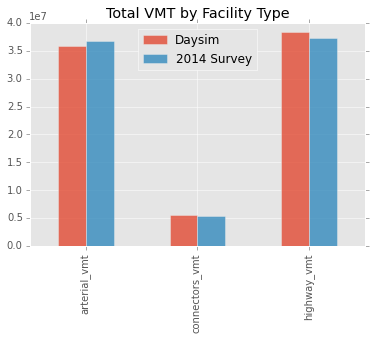

In [311]:
df.drop('Total',inplace=True)
df.plot(kind='bar',alpha=0.8,title='Total VMT by Facility Type')

** VMT Distribution by Facility Type**

In [312]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

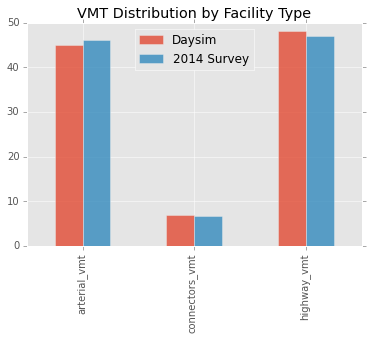

In [313]:
df.plot(kind='bar',alpha=0.8, title='VMT Distribution by Facility Type')

--------------

# Delay by TOD

In [314]:
# compare scenarios
vmt_scen = net_sum_scen.groupby('TP_4k').sum()
vmt_base = net_sum_base.groupby('TP_4k').sum()

# Select only VMT columns
vmt_scen = vmt_scen[vmt_scen.columns[[i.endswith('_delay') for i in vmt_scen.columns]]]
vmt_base = vmt_base[vmt_base.columns[[i.endswith('_delay') for i in vmt_base.columns]]]

In [315]:
# Sort TOD in coherent order
tod = {
    'am': 0,
    'md': 1,
    'pm': 2,
    'ev': 3,
    'ni': 4
}

In [316]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=1),
              vmt_base.sum(axis=1)]).T
df.columns=[scen_name,base_name]

# sort columns
df['tod_index'] = ([tod[x] for x in df.index])
df.sort('tod_index',inplace=True)
df.drop('tod_index',axis=1,inplace=True)
df.loc['Total'] = df.sum(axis=0)
df

,Daysim,2014 Survey
am,"72,648","57,915"
md,"164,023","122,335"
pm,"157,945","126,343"
ev,"59,289","42,200"
ni,"59,178","41,908"
Total,"513,084","390,700"


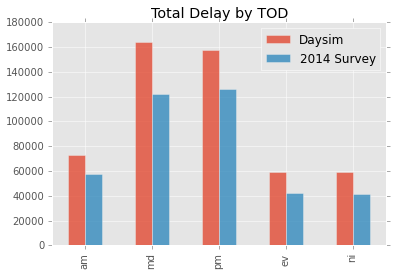

In [317]:
df.drop('Total',inplace=True)
df.plot(kind='bar', alpha=0.8,title='Total Delay by TOD')

**Delay Distribution by TOD**

In [318]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

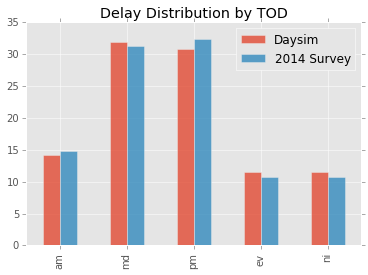

In [319]:
df.plot(kind='bar',alpha=0.8, title='Delay Distribution by TOD')

## Total Delay by Facility Type

In [320]:
pd.options.display.float_format = '{:,.0f}'.format

df = pd.DataFrame([vmt_scen.sum(axis=0),
              vmt_base.sum(axis=0)]).T
df.columns=[scen_name,base_name]
df.loc['Total'] = df.sum(axis=0)
df.drop('connectors_delay',inplace=True)
df

,Daysim,2014 Survey
arterial_delay,"344,815","241,490"
highway_delay,"168,268","149,210"
Total,"513,084","390,700"


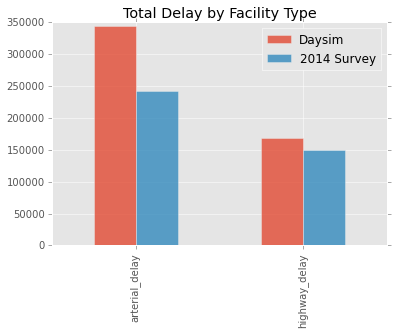

In [321]:
df.drop('Total',inplace=True)
df.plot(kind='bar',alpha=0.8,title='Total Delay by Facility Type')

**Delay Distribution by Facility Type**

In [322]:
pd.options.display.float_format = '{:.1f}%'.format 
df = df/df.sum()*100

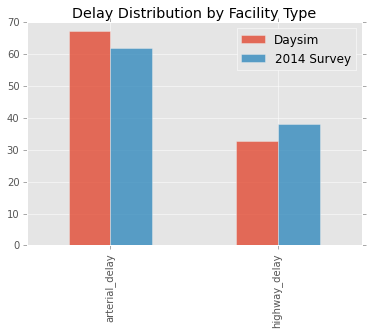

In [323]:
df.plot(kind='bar',alpha=0.8, title='Delay Distribution by Facility Type')

# VMT/VHT/Delay by County, City, Regional Center

by Household Location

In [324]:
# use the daysim results for this